# Python and Pandas 



## The importance of data preprocessing

Data preprocessing (also called data wrangling, cleaning, scrubbing, etc) is the most important thing you will do with your data because it sets the stage for the analysis part of your data analysis workflow. The preprocessing you do largely depends on what kind of data you have, what sort of analysis you'll be doing with your data, and what you intend to do with the results.

Preprocessing is also a process for getting to know your data, and can answer questions such as these (and more): 

- What kind of data are you working with? 
- Is it categorical, continuous, or a mix of both? 
- What's the distribution of features in your dataset? 
- What sort of wrangling do you have to do?
- Do you have any missing data? 
- Do you need to remove missing data?
- Do you need only a subset of your data?
- Do you need more data?
- Or less?

The questions you'll have to answer are, again, dependent upon the data that you're working with, and preprocessing can be a way to figure that out.

## What is Pandas?

Pandas is by far the go to preprocessing tool for most data munging tasks. It's a data wrangling/modeling/analysis tool that is similar to R and Excel; in fact, the DataFrame data structure in Pandas was named after the DataFrame in R. Pandas comes with several easy-to-use data structures, two of which (the `Series` and the `DataFrame`) we will be covering here.

We will also be covering a bunch of different wrangling tools, as well as a couple of analysis tools.

## Why Pandas?

So, why would you want to use Python, as opposed to tools like R and Excel? We prefer to use it because we like to keep everything in Python, from start to finish. It just makes it easier if we don't have to switch back and forth between other tools. Also, if we have to build in preprocessing as part of a production system, which for most data analysis workflows, it makes sense to just do it in Python from the beginning. 

Pandas is great for preprocessing, as we'll see, and it can be easily combined with other modules from the scientific Python stack.

## Pandas data structures

Pandas has several different data structures, but we're going to talk about the `Series` and the `DataFrame`.

### The Series

The `Series` is a one-dimensional array that can hold a variety of data types, including a mix of those types. The row labels in a `Series` are collectively called the index. You can create a `Series` in a few different ways. Here's how you'd create a `Series` from a list.

In [1]:
import pandas as pd

some_numbers = [2, 5, 7, 3, 8]

series_1 = pd.Series(some_numbers)
series_1

0    2
1    5
2    7
3    3
4    8
dtype: int64

To specify an index, you can also pass in a list.

In [2]:
ind = ['a', 'b', 'c', 'd', 'e']

series_2 = pd.Series(some_numbers, index=ind)
series_2

a    2
b    5
c    7
d    3
e    8
dtype: int64

We can pull that index back out again, too, with the `.index` attribute.

In [3]:
series_2.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

You can also create a `Series` with a dictionary. The keys of the dictionary will be used as the index, and the values will be used as the `Series` array.

In [4]:
lami = {'odong': 9, 'misua': 5, 'canton': 7, 'bihon': 6}

series_3 = pd.Series(lami)
series_3

bihon     6
canton    7
misua     5
odong     9
dtype: int64

### The DataFrame

The `DataFrame` is Pandas' most used data structure. It's a two and greater dimensional structure that can also hold a variety of mixed data types. It's similar to a spreadsheet in Excel or a SQL table. You can create a `DataFrame` with a few different methods. First, let's look at how to create a `DataFrame` from multiple `Series` objects.

In [5]:
yummy = ['odong', 'misua', 'tanghon', 'canton', 'bihon'] 
papi = ['tom', 'derek', 'james', 'harrie', 'andrei']

In [6]:
lodi = pd.DataFrame([yummy, papi])
lodi

0      1        2       3       4
0  odong  misua  tanghon  canton   bihon
1    tom  derek    james  harrie  andrei

In [7]:
type(lodi)

pandas.core.frame.DataFrame

In [8]:
lodi.dtypes

0    object
1    object
2    object
3    object
4    object
dtype: object

Another way to create a `DataFrame` is with a dictionary of lists. This is pretty straightforward:

In [9]:
data = {'col1': ['i', 'love', 'pandas', 'so', 'much'],
        'col2': ['so', 'will', 'you', 'i', 'promise']}

df = pd.DataFrame(data)

In [10]:
df

col1     col2
0       i       so
1    love     will
2  pandas      you
3      so        i
4    much  promise

Dataframes can be concatenated via `pd.concat` function

In [11]:
more_data = {'col1': ['lodi', 'derek', 'piolo', 'sir g', 'tom'],
        'col2': ['tanduay', 'donuts', 'donuts', 'sugar', 'odong']}
more_df = pd.DataFrame(more_data)

In [12]:
more_df

col1     col2
0   lodi  tanduay
1  derek   donuts
2  piolo   donuts
3  sir g    sugar
4    tom    odong

In [13]:
harrie_df = pd.concat([df, more_df], ignore_index=True)

In [14]:
harrie_df

col1     col2
0       i       so
1    love     will
2  pandas      you
3      so        i
4    much  promise
5    lodi  tanduay
6   derek   donuts
7   piolo   donuts
8   sir g    sugar
9     tom    odong

### File I/O

It's really easy to read data into Pandas from a file. Pandas will read your file directly into a `DataFrame`. There are multiple ways to read in files, but they all work in the same way. Here's how you read in a CSV file:

In [15]:
time_violations_df = pd.read_csv('./dataset/timekeeping_violations.csv')

### About the Dataset
The dataset was provided via request from the HR's Google Spreadsheets and some records are anonymized to maintain confidentiality of the records

To examine the first 5 rows in a ```Dataframe``` use the ```head``` function

In [18]:
time_violations_df.head()

Month and Number of Working Days --> Unnamed: 1 Unnamed: 2   Dec 20  \
0                        EMPLOYEE NAME     GENDER       TEAM  < 8 Hrs   
1                            Aristotle          F          1        3   
2                           Archimedes          M         10        3   
3                                 Bell          M         10        8   
4                            Bernoulli          F          7        0   

  Unnamed: 4       Unnamed: 5   Jan 22 Unnamed: 7       Unnamed: 8   Feb 19  \
0  > 10:30AM  Violations > 4x  < 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs   
1          0                1        1          0                1        2   
2          0                1        1          0                0        1   
3          1                0       12          2                2        5   
4          0                1        1          0                1        5   

        ...             Unnamed: 14 April 20 Unnamed: 16      Unnamed: 17  \
0       ...         Violations > 4x  < 8 Hrs   > 10:30AM  Violations > 4x   
1       ...                       0        3           0                1   
2       ...                       0        5           0                0   
3       ...                       1        7           0                0   
4       ...                       1        1           0                0   

    May 22 Unnamed: 19      Unnamed: 20  June 19 Unnamed: 22      Unnamed: 23  
0  < 8 Hrs   > 10:30AM  Violations > 4x  < 8 Hrs   > 10:30AM  Violations > 4x  
1        3           0                1        3           0                1  
2        1           0                0        3           0                0  
3       11           2                0        7           1                2  
4        1           0                0        1           0                0  

[5 rows x 24 columns]

We strip out the first row for the Month and working days of that month. 

In [19]:
time_violations_df = pd.read_csv('./dataset/timekeeping_violations.csv', skiprows=1)
time_violations_df.head()

EMPLOYEE NAME GENDER  TEAM  < 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs.1  \
0     Aristotle      F     1      3.0        0.0              1.0        1.0   
1    Archimedes      M    10      3.0        0.0              1.0        1.0   
2          Bell      M    10      8.0        1.0              0.0       12.0   
3     Bernoulli      F     7      0.0        0.0              1.0        1.0   
4          Bohr      F     3      8.0        0.0              0.0        3.0   

   > 10:30AM.1  Violations > 4x.1  < 8 Hrs.2        ...          \
0          0.0                1.0        2.0        ...           
1          0.0                0.0        1.0        ...           
2          2.0                2.0        5.0        ...           
3          0.0                1.0        5.0        ...           
4          0.0                0.0        4.0        ...           

   Violations > 4x.3  < 8 Hrs.4  > 10:30AM.4  Violations > 4x.4  < 8 Hrs.5  \
0                0.0        3.0          0.0                1.0          3   
1                0.0        5.0          0.0                0.0          1   
2                1.0        7.0          0.0                0.0         11   
3                1.0        1.0          0.0                0.0          1   
4                0.0        1.0          0.0                0.0         10   

   > 10:30AM.5  Violations > 4x.5  < 8 Hrs.6  > 10:30AM.6  Violations > 4x.6  
0            0                  1          3            0                  1  
1            0                  0          3            0                  0  
2            2                  0          7            1                  2  
3            0                  0          1            0                  0  
4            1                  0          8            3                  0  

[5 rows x 24 columns]

Rename ```EMPLOYEE NAME``` , ```TEAM``` and ```GENDER``` columns to ```Employee```, ```Team``` and ```Gender``` respectively for readability

In [20]:
time_violations_df.columns = time_violations_df.columns.str.replace('EMPLOYEE NAME', 'EmployeeName')
time_violations_df.columns = time_violations_df.columns.str.replace('GENDER', 'Gender')
time_violations_df.columns = time_violations_df.columns.str.replace('TEAM', 'Team')

## Exploring the data

Here are some different ways to explore the data we have. Let's first take a look at some of the basic characteristics of the `time_violations_df` dataset. You can easily find the number of rows and the number of columns a dataframe has using the `.shape` attribute.

In [21]:
time_violations_df.shape

(49, 24)

To extract the column name use the ```.columns``` attribute of the dataframe

In [23]:
time_violations_df.columns

Index(['EmployeeName', 'Gender', 'Team', '< 8 Hrs', '> 10:30AM',
       'Violations > 4x', '< 8 Hrs.1', '> 10:30AM.1', 'Violations > 4x.1',
       '< 8 Hrs.2', '> 10:30AM.2', 'Violations > 4x.2', '< 8 Hrs.3',
       '> 10:30AM.3', 'Violations > 4x.3', '< 8 Hrs.4', '> 10:30AM.4',
       'Violations > 4x.4', '< 8 Hrs.5', '> 10:30AM.5', 'Violations > 4x.5',
       '< 8 Hrs.6', '> 10:30AM.6', 'Violations > 4x.6'],
      dtype='object')

Another useful thing you can do is generate some summary statistics using the `describe()` function. The `describe()` function calculates descriptive statistics like the mean, standard deviation, and quartile values for continuous and integer data that exist in your dataset. Don't worry, Pandas won't try to calculate the standard deviation of your categorical values!

In [24]:
time_violations_df.describe()

Team    < 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs.1  \
count  49.000000  42.000000  42.000000        42.000000  42.000000   
mean    5.306122   4.047619   1.571429         0.428571   3.595238   
std     3.001417   4.190305   3.061507         0.769633   4.311412   
min     1.000000   0.000000   0.000000         0.000000   0.000000   
25%     3.000000   1.000000   0.000000         0.000000   1.000000   
50%     5.000000   2.000000   0.000000         0.000000   2.000000   
75%     8.000000   6.000000   1.750000         1.000000   4.750000   
max    10.000000  15.000000  14.000000         3.000000  18.000000   

       > 10:30AM.1  Violations > 4x.1  < 8 Hrs.2  > 10:30AM.2  \
count    42.000000          42.000000  44.000000    44.000000   
mean      1.452381           0.476190   3.250000     1.250000   
std       3.292285           0.671296   4.018128     2.615917   
min       0.000000           0.000000   0.000000     0.000000   
25%       0.000000           0.000000   1.000000     0.000000   
50%       0.000000           0.000000   2.000000     0.000000   
75%       1.750000           1.000000   4.000000     1.000000   
max      15.000000           2.000000  17.000000    13.000000   

       Violations > 4x.2        ...          Violations > 4x.3  < 8 Hrs.4  \
count          44.000000        ...                  45.000000  45.000000   
mean            0.386364        ...                   0.466667   3.600000   
std             0.579330        ...                   1.035725   4.196319   
min             0.000000        ...                   0.000000   0.000000   
25%             0.000000        ...                   0.000000   1.000000   
50%             0.000000        ...                   0.000000   2.000000   
75%             1.000000        ...                   1.000000   4.000000   
max             2.000000        ...                   5.000000  19.000000   

       > 10:30AM.4  Violations > 4x.4  < 8 Hrs.5  > 10:30AM.5  \
count    45.000000          45.000000  49.000000    49.000000   
mean      2.644444           0.266667   3.938776     2.000000   
std       4.523452           0.539360   4.701100     3.818813   
min       0.000000           0.000000   0.000000     0.000000   
25%       0.000000           0.000000   1.000000     0.000000   
50%       0.000000           0.000000   2.000000     0.000000   
75%       2.000000           0.000000   4.000000     1.000000   
max      17.000000           2.000000  20.000000    14.000000   

       Violations > 4x.5  < 8 Hrs.6  > 10:30AM.6  Violations > 4x.6  
count          49.000000  49.000000    49.000000          49.000000  
mean            0.224490   4.040816     2.142857           0.244898  
std             0.468388   4.907304     4.178317           0.662401  
min             0.000000   0.000000     0.000000           0.000000  
25%             0.000000   1.000000     0.000000           0.000000  
50%             0.000000   2.000000     0.000000           0.000000  
75%             0.000000   5.000000     2.000000           0.000000  
max             2.000000  20.000000    17.000000           3.000000  

[8 rows x 22 columns]

### Filling in NAN with zeros

In [25]:
time_violations_df.fillna(0, inplace=True)

However there is a problem with the ```Team``` column, which is supposed to be a categorical variable rather than continous

In [26]:
time_violations_df.dtypes

EmployeeName          object
Gender                object
Team                   int64
< 8 Hrs              float64
> 10:30AM            float64
Violations > 4x      float64
< 8 Hrs.1            float64
> 10:30AM.1          float64
Violations > 4x.1    float64
< 8 Hrs.2            float64
> 10:30AM.2          float64
Violations > 4x.2    float64
< 8 Hrs.3            float64
> 10:30AM.3          float64
Violations > 4x.3    float64
< 8 Hrs.4            float64
> 10:30AM.4          float64
Violations > 4x.4    float64
< 8 Hrs.5              int64
> 10:30AM.5            int64
Violations > 4x.5      int64
< 8 Hrs.6              int64
> 10:30AM.6            int64
Violations > 4x.6      int64
dtype: object

We, therefore, need to cast the ```Team``` column to a categorical data type

In [27]:
time_violations_df['Team'] = time_violations_df['Team'].astype('category')
time_violations_df['Team'].head()

0     1
1    10
2    10
3     7
4     3
Name: Team, dtype: category
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]

Furthermore cast the `Gender` column to a categorical data type

In [28]:
time_violations_df['Gender'] = time_violations_df['Gender'].astype('category')
time_violations_df['Gender'].head()

0    F
1    M
2    M
3    F
4    F
Name: Gender, dtype: category
Categories (2, object): [F, M]

Recheck the data types the of columns after casting

In [29]:
time_violations_df.dtypes

EmployeeName           object
Gender               category
Team                 category
< 8 Hrs               float64
> 10:30AM             float64
Violations > 4x       float64
< 8 Hrs.1             float64
> 10:30AM.1           float64
Violations > 4x.1     float64
< 8 Hrs.2             float64
> 10:30AM.2           float64
Violations > 4x.2     float64
< 8 Hrs.3             float64
> 10:30AM.3           float64
Violations > 4x.3     float64
< 8 Hrs.4             float64
> 10:30AM.4           float64
Violations > 4x.4     float64
< 8 Hrs.5               int64
> 10:30AM.5             int64
Violations > 4x.5       int64
< 8 Hrs.6               int64
> 10:30AM.6             int64
Violations > 4x.6       int64
dtype: object

Running the ```describe``` method now excludes the ```Team``` column from summary computations

In [30]:
time_violations_df.describe()

< 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs.1  > 10:30AM.1  \
count  49.000000  49.000000        49.000000  49.000000    49.000000   
mean    3.469388   1.346939         0.367347   3.081633     1.244898   
std     4.128670   2.883509         0.727263   4.182487     3.085791   
min     0.000000   0.000000         0.000000   0.000000     0.000000   
25%     0.000000   0.000000         0.000000   0.000000     0.000000   
50%     2.000000   0.000000         0.000000   2.000000     0.000000   
75%     5.000000   1.000000         0.000000   4.000000     1.000000   
max    15.000000  14.000000         3.000000  18.000000    15.000000   

       Violations > 4x.1  < 8 Hrs.2  > 10:30AM.2  Violations > 4x.2  \
count          49.000000  49.000000    49.000000          49.000000   
mean            0.408163   2.918367     1.122449           0.346939   
std             0.642857   3.930843     2.505267           0.560915   
min             0.000000   0.000000     0.000000           0.000000   
25%             0.000000   1.000000     0.000000           0.000000   
50%             0.000000   2.000000     0.000000           0.000000   
75%             1.000000   4.000000     1.000000           1.000000   
max             2.000000  17.000000    13.000000           2.000000   

       < 8 Hrs.3        ...          Violations > 4x.3  < 8 Hrs.4  \
count  49.000000        ...                  49.000000  49.000000   
mean    3.489796        ...                   0.428571   3.306122   
std     4.287202        ...                   1.000000   4.139264   
min     0.000000        ...                   0.000000   0.000000   
25%     0.000000        ...                   0.000000   1.000000   
50%     2.000000        ...                   0.000000   2.000000   
75%     4.000000        ...                   0.000000   4.000000   
max    15.000000        ...                   5.000000  19.000000   

       > 10:30AM.4  Violations > 4x.4  < 8 Hrs.5  > 10:30AM.5  \
count    49.000000          49.000000  49.000000    49.000000   
mean      2.428571           0.244898   3.938776     2.000000   
std       4.392228           0.521641   4.701100     3.818813   
min       0.000000           0.000000   0.000000     0.000000   
25%       0.000000           0.000000   1.000000     0.000000   
50%       0.000000           0.000000   2.000000     0.000000   
75%       2.000000           0.000000   4.000000     1.000000   
max      17.000000           2.000000  20.000000    14.000000   

       Violations > 4x.5  < 8 Hrs.6  > 10:30AM.6  Violations > 4x.6  
count          49.000000  49.000000    49.000000          49.000000  
mean            0.224490   4.040816     2.142857           0.244898  
std             0.468388   4.907304     4.178317           0.662401  
min             0.000000   0.000000     0.000000           0.000000  
25%             0.000000   1.000000     0.000000           0.000000  
50%             0.000000   2.000000     0.000000           0.000000  
75%             0.000000   5.000000     2.000000           0.000000  
max             2.000000  20.000000    17.000000           3.000000  

[8 rows x 21 columns]

Additionally, the ```df.info()``` function shows even more useful info.

In [31]:
time_violations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 24 columns):
EmployeeName         49 non-null object
Gender               49 non-null category
Team                 49 non-null category
< 8 Hrs              49 non-null float64
> 10:30AM            49 non-null float64
Violations > 4x      49 non-null float64
< 8 Hrs.1            49 non-null float64
> 10:30AM.1          49 non-null float64
Violations > 4x.1    49 non-null float64
< 8 Hrs.2            49 non-null float64
> 10:30AM.2          49 non-null float64
Violations > 4x.2    49 non-null float64
< 8 Hrs.3            49 non-null float64
> 10:30AM.3          49 non-null float64
Violations > 4x.3    49 non-null float64
< 8 Hrs.4            49 non-null float64
> 10:30AM.4          49 non-null float64
Violations > 4x.4    49 non-null float64
< 8 Hrs.5            49 non-null int64
> 10:30AM.5          49 non-null int64
Violations > 4x.5    49 non-null int64
< 8 Hrs.6            49 non-null int64
> 

## Working with dataframes

Pandas has a ton of functionality for manipulating and wrangling the data. Let's look at a bunch of different ways to select and subset our data.

### Selecting columns and rows

There are multiple ways to select by both rows and columns. From index to slicing to label to position, there are a variety of methods to suit your data wrangling needs.

Let's select just the `Employee Name` column from the `time_violations_df` dataframe. This works similar to how you would access values from a dictionary:

In [32]:
time_violations_df['EmployeeName'].head()

0     Aristotle
1    Archimedes
2          Bell
3     Bernoulli
4          Bohr
Name: EmployeeName, dtype: object

You can do exactly the same thing by using `EmployeeName` as an attribute:

In [33]:
time_violations_df.EmployeeName.head()

0     Aristotle
1    Archimedes
2          Bell
3     Bernoulli
4          Bohr
Name: EmployeeName, dtype: object

To extract rows from a `DataFrame`, you can use the slice method, similar to how you would slice a list. Here's how we would grab rows 7-13 from the `time_violations_df`:

In [34]:
time_violations_df[7:14]

EmployeeName Gender Team  < 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs.1  \
7           Curie      F    1     13.0        4.0              0.0       18.0   
8          Dalton      F    8      3.0        2.0              0.0        1.0   
9          Darwin      F    1      0.0        0.0              0.0        0.0   
10      Descartes      F    6      2.0        0.0              0.0        4.0   
11       Einstein      M    9      2.0        0.0              2.0        0.0   
12  Erastosthenes      M   10      4.0        0.0              0.0        0.0   
13        Faraday      M   10      1.0        0.0              0.0        7.0   

    > 10:30AM.1  Violations > 4x.1  < 8 Hrs.2        ...          \
7           3.0                0.0       16.0        ...           
8           1.0                0.0        1.0        ...           
9           0.0                0.0        0.0        ...           
10          1.0                0.0        4.0        ...           
11          0.0                1.0        1.0        ...           
12          0.0                0.0        0.0        ...           
13          0.0                0.0        4.0        ...           

    Violations > 4x.3  < 8 Hrs.4  > 10:30AM.4  Violations > 4x.4  < 8 Hrs.5  \
7                 0.0       19.0         11.0                0.0         18   
8                 0.0        3.0          0.0                0.0          0   
9                 0.0        0.0          0.0                0.0          0   
10                0.0        1.0          1.0                0.0          9   
11                2.0        2.0          0.0                0.0          3   
12                0.0        2.0          1.0                0.0          0   
13                0.0        2.0          0.0                1.0          3   

    > 10:30AM.5  Violations > 4x.5  < 8 Hrs.6  > 10:30AM.6  Violations > 4x.6  
7            14                  1         18           14                  0  
8             0                  0          0            0                  0  
9             0                  0          0            0                  0  
10            3                  0          6            1                  0  
11            0                  0          1            0                  0  
12            0                  0          0            0                  0  
13            1                  1          2            0                  0  

[7 rows x 24 columns]

Pandas also has tools for purely label-based selection of rows and columns using the `.loc` indexer. The `.loc` indexer takes input as `[row, column]`. 

For example, let's say we wanted to select the `Gender` value in the 8th instance in our `time_violations_df`:

In [35]:
time_violations_df.loc[8,'Gender']

'F'

We can also use `.loc` to grab slices. It's important to note that `.loc` interprets the index as a *label*. This means that, if we select a range, it will grab the last item in the range, unlike slicing in a list. The index is the label for the rows. Let's grab the abv for rows 8 to 11 from the `time_violations_df`.

In [36]:
time_violations_df.loc[8:11, 'Gender']

8     F
9     F
10    F
11    M
Name: Gender, dtype: category
Categories (2, object): [F, M]

Finally, let's just grab all columns for rows 8 to 11.

In [37]:
time_violations_df.loc[8:11,:]

EmployeeName Gender Team  < 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs.1  \
8        Dalton      F    8      3.0        2.0              0.0        1.0   
9        Darwin      F    1      0.0        0.0              0.0        0.0   
10    Descartes      F    6      2.0        0.0              0.0        4.0   
11     Einstein      M    9      2.0        0.0              2.0        0.0   

    > 10:30AM.1  Violations > 4x.1  < 8 Hrs.2        ...          \
8           1.0                0.0        1.0        ...           
9           0.0                0.0        0.0        ...           
10          1.0                0.0        4.0        ...           
11          0.0                1.0        1.0        ...           

    Violations > 4x.3  < 8 Hrs.4  > 10:30AM.4  Violations > 4x.4  < 8 Hrs.5  \
8                 0.0        3.0          0.0                0.0          0   
9                 0.0        0.0          0.0                0.0          0   
10                0.0        1.0          1.0                0.0          9   
11                2.0        2.0          0.0                0.0          3   

    > 10:30AM.5  Violations > 4x.5  < 8 Hrs.6  > 10:30AM.6  Violations > 4x.6  
8             0                  0          0            0                  0  
9             0                  0          0            0                  0  
10            3                  0          6            1                  0  
11            0                  0          1            0                  0  

[4 rows x 24 columns]

### Boolean Indexing

One of Panda's methods for selecting data is through boolean indexing. Boolean indexing is similar to the WHERE clause in SQL in that it allows you to filter out data based on certain criteria. Let's see how this works.

Let's select from the `time_violations_df` where `Gender` is `F`.

In [38]:
time_violations_df[time_violations_df['Gender'] == 'F']

EmployeeName Gender Team  < 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs.1  \
0     Aristotle      F    1      3.0        0.0              1.0        1.0   
3     Bernoulli      F    7      0.0        0.0              1.0        1.0   
4          Bohr      F    3      8.0        0.0              0.0        3.0   
6    Copernicus      F    6      1.0        0.0              0.0        4.0   
7         Curie      F    1     13.0        4.0              0.0       18.0   
8        Dalton      F    8      3.0        2.0              0.0        1.0   
9        Darwin      F    1      0.0        0.0              0.0        0.0   
10    Descartes      F    6      2.0        0.0              0.0        4.0   
32        Volta      F    9      0.0        0.0              0.0        0.0   
37      Guevara      F    1     15.0       10.0              0.0        9.0   

    > 10:30AM.1  Violations > 4x.1  < 8 Hrs.2        ...          \
0           0.0                1.0        2.0        ...           
3           0.0                1.0        5.0        ...           
4           0.0                0.0        4.0        ...           
6           0.0                0.0        2.0        ...           
7           3.0                0.0       16.0        ...           
8           1.0                0.0        1.0        ...           
9           0.0                0.0        0.0        ...           
10          1.0                0.0        4.0        ...           
32          0.0                0.0        0.0        ...           
37          3.0                1.0        7.0        ...           

    Violations > 4x.3  < 8 Hrs.4  > 10:30AM.4  Violations > 4x.4  < 8 Hrs.5  \
0                 0.0        3.0          0.0                1.0          3   
3                 1.0        1.0          0.0                0.0          1   
4                 0.0        1.0          0.0                0.0         10   
6                 0.0        6.0          5.0                0.0          3   
7                 0.0       19.0         11.0                0.0         18   
8                 0.0        3.0          0.0                0.0          0   
9                 0.0        0.0          0.0                0.0          0   
10                0.0        1.0          1.0                0.0          9   
32                1.0        1.0          0.0                0.0          0   
37                0.0        4.0         11.0                0.0          4   

    > 10:30AM.5  Violations > 4x.5  < 8 Hrs.6  > 10:30AM.6  Violations > 4x.6  
0             0                  1          3            0                  1  
3             0                  0          1            0                  0  
4             1                  0          8            3                  0  
6             0                  0          0            1                  0  
7            14                  1         18           14                  0  
8             0                  0          0            0                  0  
9             0                  0          0            0                  0  
10            3                  0          6            1                  0  
32            0                  0          1            1                  0  
37            9                  1          1            4                  0  

[10 rows x 24 columns]

This works with any comparison operators, like >, < >=, !=, and so on.

### Groupby

`groupby()` is just like SQL's 'group by' clause. What ```groupby``` does is a three-step process:

- Split the data
- Apply a function to the split groups
- Recombine the data

In the apply step, you can do things like apply a statistical function, filter out data, or transform the data.

Let's `groupby()` the `Team` in our  `time_violations_df` DataFrame! Let's start with just  `groupby()`, and then build it from there. This will produce a `DataFrame groupby` object.

In [39]:
time_violations_df.groupby('Team')

Not so interesting yet. This object has some attributes you can access. We can get lists of which rows are in which group by using the `.groups` attribute:

In [40]:
time_violations_df.groupby('Team').groups

{1: Int64Index([0, 5, 7, 9, 22, 36, 37, 39, 40], dtype='int64'),
 2: Int64Index([19, 29], dtype='int64'),
 3: Int64Index([4, 21, 28, 47], dtype='int64'),
 4: Int64Index([15, 24, 38, 43, 44], dtype='int64'),
 5: Int64Index([17, 18, 30, 42, 46], dtype='int64'),
 6: Int64Index([6, 10, 20, 26, 31], dtype='int64'),
 7: Int64Index([3, 16, 33, 35, 45, 48], dtype='int64'),
 8: Int64Index([8, 25, 27, 34], dtype='int64'),
 9: Int64Index([11, 14, 23, 32], dtype='int64'),
 10: Int64Index([1, 2, 12, 13, 41], dtype='int64')}

The dataset was in order by `Team` to begin with, so that makes sense. To get just the keys, add the `.keys()` function to the end of that line.

In [41]:
time_violations_df.groupby('Team').groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Expanding further the `time_violations_df` example, let's apply an aggregate function. Let's generate the mean of all the other values and group them by `Gender`.

In [42]:
time_violations_df.groupby('Gender').mean()

< 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs.1  > 10:30AM.1  \
Gender                                                                 
F       4.500000   1.600000         0.200000   4.100000     0.800000   
M       3.205128   1.282051         0.410256   2.820513     1.358974   

        Violations > 4x.1  < 8 Hrs.2  > 10:30AM.2  Violations > 4x.2  \
Gender                                                                 
F                0.300000   4.100000     1.300000           0.600000   
M                0.435897   2.615385     1.076923           0.282051   

        < 8 Hrs.3        ...          Violations > 4x.3  < 8 Hrs.4  \
Gender                   ...                                         
F        4.900000        ...                   0.200000   3.900000   
M        3.128205        ...                   0.487179   3.153846   

        > 10:30AM.4  Violations > 4x.4  < 8 Hrs.5  > 10:30AM.5  \
Gender                                                           
F          2.800000           0.100000   4.800000     2.700000   
M          2.333333           0.282051   3.717949     1.820513   

        Violations > 4x.5  < 8 Hrs.6  > 10:30AM.6  Violations > 4x.6  
Gender                                                                
F                0.300000   3.800000     2.400000           0.100000  
M                0.205128   4.102564     2.076923           0.282051  

[2 rows x 21 columns]

It's also possible to apply multiple functions to the entire `DataFrame` using the `agg()` function. Let's get not only the mean, but the count and the standard deviation as well for each value in the `DataFrame`, still grouping by `Gender`.

In [43]:
time_violations_df.groupby('Gender').agg(['mean', 'count', 'std'])

< 8 Hrs                 > 10:30AM                 Violations > 4x  \
            mean count       std      mean count       std            mean   
Gender                                                                       
F       4.500000    10  5.562773  1.600000    10  3.238655        0.200000   
M       3.205128    39  3.721767  1.282051    39  2.827950        0.410256   

                       < 8 Hrs.1    ...    Violations > 4x.5 < 8 Hrs.6        \
       count       std      mean    ...                  std      mean count   
Gender                              ...                                        
F         10  0.421637  4.100000    ...             0.483046  3.800000    10   
M         39  0.785324  2.820513    ...             0.469013  4.102564    39   

                 > 10:30AM.6                 Violations > 4x.6                  
             std        mean count       std              mean count       std  
Gender                                                                          
F       5.692100    2.400000    10  4.299871          0.100000    10  0.316228  
M       4.767184    2.076923    39  4.201407          0.282051    39  0.723614  

[2 rows x 63 columns]

## Alternative library for munging and transforming DataFrames
I often use R’s dplyr package for exploratory data analysis and data manipulation. In addition to providing a consistent set of functions that one can use to solve the most common data manipulation problems, dplyr also allows one to write elegant, chainable data manipulation code using pipes.

https://github.com/kieferk/dfply 

dplyr-style piping operations for pandas dataframes 

#### To install type: 
```pip install dfply```


Importing the dfply library:

In [44]:
from dfply import *

In [45]:
time_violations_df >> head(3)

EmployeeName Gender Team  < 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs.1  \
0    Aristotle      F    1      3.0        0.0              1.0        1.0   
1   Archimedes      M   10      3.0        0.0              1.0        1.0   
2         Bell      M   10      8.0        1.0              0.0       12.0   

   > 10:30AM.1  Violations > 4x.1  < 8 Hrs.2        ...          \
0          0.0                1.0        2.0        ...           
1          0.0                0.0        1.0        ...           
2          2.0                2.0        5.0        ...           

   Violations > 4x.3  < 8 Hrs.4  > 10:30AM.4  Violations > 4x.4  < 8 Hrs.5  \
0                0.0        3.0          0.0                1.0          3   
1                0.0        5.0          0.0                0.0          1   
2                1.0        7.0          0.0                0.0         11   

   > 10:30AM.5  Violations > 4x.5  < 8 Hrs.6  > 10:30AM.6  Violations > 4x.6  
0            0                  1          3            0                  1  
1            0                  0          3            0                  0  
2            2                  0          7            1                  2  

[3 rows x 24 columns]

In [46]:
time_violations_df >> tail(3)

EmployeeName Gender Team  < 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs.1  \
46     Stallone      M    5      0.0        0.0              0.0        0.0   
47       Norris      M    3      0.0        0.0              0.0        0.0   
48      Mercury      M    7      0.0        0.0              0.0        0.0   

    > 10:30AM.1  Violations > 4x.1  < 8 Hrs.2        ...          \
46          0.0                0.0        0.0        ...           
47          0.0                0.0        0.0        ...           
48          0.0                0.0        0.0        ...           

    Violations > 4x.3  < 8 Hrs.4  > 10:30AM.4  Violations > 4x.4  < 8 Hrs.5  \
46                0.0        0.0          0.0                0.0          0   
47                0.0        0.0          0.0                0.0          0   
48                0.0        0.0          0.0                0.0          0   

    > 10:30AM.5  Violations > 4x.5  < 8 Hrs.6  > 10:30AM.6  Violations > 4x.6  
46            0                  0          2            0                  0  
47            0                  0          1            0                  0  
48            0                  0          2            1                  0  

[3 rows x 24 columns]

You can chain piped operations, and of course assign the output to a new DataFrame.

In [47]:
new_time_violations_df = time_violations_df >> tail(10) >> head (3)
new_time_violations_df

EmployeeName Gender Team  < 8 Hrs  > 10:30AM  Violations > 4x  < 8 Hrs.1  \
39         Khan      M    1      1.0        0.0              0.0        0.0   
40       Chopra      M    1      1.0        0.0              0.0        0.0   
41       Aquino      M   10     11.0        1.0              0.0        7.0   

    > 10:30AM.1  Violations > 4x.1  < 8 Hrs.2        ...          \
39          0.0                0.0        0.0        ...           
40          0.0                0.0        1.0        ...           
41          0.0                0.0        4.0        ...           

    Violations > 4x.3  < 8 Hrs.4  > 10:30AM.4  Violations > 4x.4  < 8 Hrs.5  \
39                0.0        5.0          0.0                0.0          1   
40                0.0        0.0          0.0                0.0          3   
41                0.0       13.0          0.0                0.0         20   

    > 10:30AM.5  Violations > 4x.5  < 8 Hrs.6  > 10:30AM.6  Violations > 4x.6  
39            0                  0          2            0                  0  
40            1                  0          1            0                  0  
41            0                  0         13            0                  0  

[3 rows x 24 columns]

### Dataframe Slice and Dice
As one can observe there is a repetitive sequence of columns namely `< 8 hours`, `> 10:30AM`, and `Violations > 4x` 
As the first row in the source dataset csv that we skipped contains information for the `Month` and `Number of Working Days` for that month.

Additional data munging steps need to be performed in order to fix the dataset and enrich it with additional columns

* Split the `time_violations_df` to separate dataframes
* Each split will contain `EmployeeName`, 'Gender', `Team` and 3 columns for `< 8 hours`, `> 10:30AM`, and `Violations > 4x` respectively
* The columns `< 8 hours`, `> 10:30AM`, and `Violations > 4x`  will be renamed `Undertime`, `Late`, `ExceedFourViolations` for each dataframe split
* There will be 8 separate dataframes (for each month) from `December` to `June`

Using the `.iloc` function 
`time_violations_df.iloc[columns, rows])`

Starting with the subset for `December`

In [48]:
december_df = time_violations_df.iloc[:, 0:6]

In [49]:
december_df.head()

EmployeeName Gender Team  < 8 Hrs  > 10:30AM  Violations > 4x
0    Aristotle      F    1      3.0        0.0              1.0
1   Archimedes      M   10      3.0        0.0              1.0
2         Bell      M   10      8.0        1.0              0.0
3    Bernoulli      F    7      0.0        0.0              1.0
4         Bohr      F    3      8.0        0.0              0.0

Rename the columns of `december_df` for readability

In [50]:
december_df.columns = december_df.columns.str.replace('< 8 Hrs', 'Undertime')
december_df.columns = december_df.columns.str.replace('> 10:30AM', 'Late')
december_df.columns = december_df.columns.str.replace('Violations > 4x*', 'ExceedFourViolations')

In [51]:
december_df >> head()

EmployeeName Gender Team  Undertime  Late  ExceedFourViolations
0    Aristotle      F    1        3.0   0.0                   1.0
1   Archimedes      M   10        3.0   0.0                   1.0
2         Bell      M   10        8.0   1.0                   0.0
3    Bernoulli      F    7        0.0   0.0                   1.0
4         Bohr      F    3        8.0   0.0                   0.0

### The X DataFrame symbol

The DataFrame as it is passed through the piping operations is represented by the symbol X.

In [52]:
december_df >> select(X.EmployeeName, X.Team, X.Gender, X.Undertime) >> head()

EmployeeName Team Gender  Undertime
0    Aristotle    1      F        3.0
1   Archimedes   10      M        3.0
2         Bell   10      M        8.0
3    Bernoulli    7      F        0.0
4         Bohr    3      F        8.0

### Selecting and dropping
`select()` and `drop()` functions

There are two functions for selection, inverse of each other: select and drop. The select and drop functions accept string labels, integer positions, and/or symbolically represented column names (X.column).

In [53]:
december_df >> select(X.EmployeeName, X.Team, X.Gender, X.Undertime, X.Late) >> head()

EmployeeName Team Gender  Undertime  Late
0    Aristotle    1      F        3.0   0.0
1   Archimedes   10      M        3.0   0.0
2         Bell   10      M        8.0   1.0
3    Bernoulli    7      F        0.0   0.0
4         Bohr    3      F        8.0   0.0

If you were instead to use drop, you would get back all columns besides those specified.

In [54]:
december_df >> drop(X.Late, X.ExceedFourViolations) >> head()

EmployeeName Gender Team  Undertime
0    Aristotle      F    1        3.0
1   Archimedes      M   10        3.0
2         Bell      M   10        8.0
3    Bernoulli      F    7        0.0
4         Bohr      F    3        8.0

### DataFrame transformation
`mutate()`

New variables (columns) can be created with the `mutate()` function 

In [55]:
december_df= december_df >> mutate(Month='December', WorkingDays=20)
december_df >> head()

EmployeeName Gender Team  Undertime  Late  ExceedFourViolations     Month  \
0    Aristotle      F    1        3.0   0.0                   1.0  December   
1   Archimedes      M   10        3.0   0.0                   1.0  December   
2         Bell      M   10        8.0   1.0                   0.0  December   
3    Bernoulli      F    7        0.0   0.0                   1.0  December   
4         Bohr      F    3        8.0   0.0                   0.0  December   

   WorkingDays  
0           20  
1           20  
2           20  
3           20  
4           20

In [56]:
december_df['Month'] = december_df['Month'].astype('category')

In [57]:
december_df.dtypes

EmployeeName              object
Gender                  category
Team                    category
Undertime                float64
Late                     float64
ExceedFourViolations     float64
Month                   category
WorkingDays                int64
dtype: object

### Grouping
`group_by()` and `ungroup()`

DataFrames are grouped along variables using the group_by() function and ungrouped with the ungroup() function. 

In [58]:
december_df >> group_by(X.Team) >> head()

/Users/alimjap/miniconda3/envs/datascience/lib/python3.6/site-packages/dfply/base.py:137: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  other_copy._grouped_by = getattr(other, '_grouped_by', None)
/Users/alimjap/miniconda3/envs/datascience/lib/python3.6/site-packages/dfply/base.py:338: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  applied._grouped_by = grouped_by


EmployeeName Gender Team  Undertime  Late  ExceedFourViolations  \
0       Aristotle      F    1        3.0   0.0                   1.0   
5           Boyle      M    1        8.0   2.0                   2.0   
7           Curie      F    1       13.0   4.0                   0.0   
9          Darwin      F    1        0.0   0.0                   0.0   
22       Lovelace      M    1        5.0   1.0                   0.0   
19         Hopper      M    2        0.0   0.0                   0.0   
29         Planck      M    2        2.0   0.0                   0.0   
4            Bohr      F    3        8.0   0.0                   0.0   
21      Lavoisier      M    3        0.0   0.0                   0.0   
28        Pasteur      M    3        1.0   2.0                   1.0   
47         Norris      M    3        0.0   0.0                   0.0   
15      Fibonacci      M    4        0.0   0.0                   0.0   
24         Mendel      M    4        1.0   8.0                   1.0   
38      Mussolini      M    4        6.0   5.0                   0.0   
43          Nixon      M    4        0.0   0.0                   0.0   
44        Presley      M    4        0.0   0.0                   0.0   
17          Gauss      M    5        2.0   0.0                   0.0   
18          Hertz      M    5        2.0   0.0                   2.0   
30     Rutherford      M    5        2.0   0.0                   1.0   
42        Duterte      M    5        0.0   0.0                   0.0   
46       Stallone      M    5        0.0   0.0                   0.0   
6      Copernicus      F    6        1.0   0.0                   0.0   
10      Descartes      F    6        2.0   0.0                   0.0   
20         Kepler      M    6        1.0   0.0                   0.0   
26    Nightingale      M    6       14.0  14.0                   0.0   
31        Seaborg      M    6       11.0   7.0                   0.0   
3       Bernoulli      F    7        0.0   0.0                   1.0   
16        Galilei      M    7        2.0   1.0                   0.0   
33           Watt      M    7        4.0   0.0                   0.0   
35        Escobar      M    7        6.0   1.0                   1.0   
45        Jackson      M    7        0.0   0.0                   0.0   
8          Dalton      F    8        3.0   2.0                   0.0   
25         Newton      M    8       11.0   2.0                   0.0   
27          Nobel      M    8        6.0   0.0                   0.0   
34        Wegener      M    8        4.0   4.0                   3.0   
11       Einstein      M    9        2.0   0.0                   2.0   
14         Fermat      M    9        4.0   0.0                   2.0   
23        Maxwell      M    9        2.0   1.0                   0.0   
32          Volta      F    9        0.0   0.0                   0.0   
1      Archimedes      M   10        3.0   0.0                   1.0   
2            Bell      M   10        8.0   1.0                   0.0   
12  Erastosthenes      M   10        4.0   0.0                   0.0   
13        Faraday      M   10        1.0   0.0                   0.0   
41         Aquino      M   10       11.0   1.0                   0.0   

       Month  WorkingDays  
0   December           20  
5   December           20  
7   December           20  
9   December           20  
22  December           20  
19  December           20  
29  December           20  
4   December           20  
21  December           20  
28  December           20  
47  December           20  
15  December           20  
24  December           20  
38  December           20  
43  December           20  
44  December           20  
17  December           20  
18  December           20  
30  December           20  
42  December           20  
46  December           20  
6   December           20  
10  December           20  
20  December           20  
26  December           20  
31  December           20  
3   Dece

### Reshaping
`arrange()`

Sorting is done by the `arrange()` function, which wraps around the pandas .sort_values() DataFrame method 

By default, the values will be arranged in ascending order

In [61]:
december_df >> arrange(X.Late, ascending=False) >> head()

EmployeeName Gender Team  Undertime  Late  ExceedFourViolations     Month  \
26  Nightingale      M    6       14.0  14.0                   0.0  December   
37      Guevara      F    1       15.0  10.0                   0.0  December   
24       Mendel      M    4        1.0   8.0                   1.0  December   
31      Seaborg      M    6       11.0   7.0                   0.0  December   
38    Mussolini      M    4        6.0   5.0                   0.0  December   

    WorkingDays  
26           20  
37           20  
24           20  
31           20  
38           20

### Subsetting and filtering
### row_slice()

Slices of rows can be selected with the row_slice() function. You can pass single integer indices or a list of indices to select rows as with. This is going to be the same as using pandas' .iloc.

In [62]:
december_df >> row_slice([3,5,15,26])

EmployeeName Gender Team  Undertime  Late  ExceedFourViolations     Month  \
3     Bernoulli      F    7        0.0   0.0                   1.0  December   
5         Boyle      M    1        8.0   2.0                   2.0  December   
15    Fibonacci      M    4        0.0   0.0                   0.0  December   
26  Nightingale      M    6       14.0  14.0                   0.0  December   

    WorkingDays  
3            20  
5            20  
15           20  
26           20

### sample()

The sample() function randomly picks `n` number of rows from a dataframe. Arguments and keyword arguments will be passed through to the DataFrame sample method. 

The `replace` parameter is set to enable unique samples to be picked 

In [72]:
december_df >> sample(n=10, replace=True)

EmployeeName Gender Team  Undertime  Late  ExceedFourViolations     Month  \
18        Hertz      M    5        2.0   0.0                   2.0  December   
27        Nobel      M    8        6.0   0.0                   0.0  December   
44      Presley      M    4        0.0   0.0                   0.0  December   
48      Mercury      M    7        0.0   0.0                   0.0  December   
43        Nixon      M    4        0.0   0.0                   0.0  December   
42      Duterte      M    5        0.0   0.0                   0.0  December   
16      Galilei      M    7        2.0   1.0                   0.0  December   
29       Planck      M    2        2.0   0.0                   0.0  December   
31      Seaborg      M    6       11.0   7.0                   0.0  December   
35      Escobar      M    7        6.0   1.0                   1.0  December   

    WorkingDays  
18           20  
27           20  
44           20  
48           20  
43           20  
42           20  
16           20  
29           20  
31           20  
35           20

### distinct()

Selection of unique rows is done with distinct(), which similarly passes arguments and keyword arguments through to the DataFrame's .drop_duplicates() method.

In [73]:
december_df >> distinct(X.Undertime) >> arrange(X.Undertime, ascending=False)

EmployeeName Gender Team  Undertime  Late  ExceedFourViolations  \
37        Guevara      F    1       15.0  10.0                   0.0   
26    Nightingale      M    6       14.0  14.0                   0.0   
7           Curie      F    1       13.0   4.0                   0.0   
25         Newton      M    8       11.0   2.0                   0.0   
2            Bell      M   10        8.0   1.0                   0.0   
27          Nobel      M    8        6.0   0.0                   0.0   
22       Lovelace      M    1        5.0   1.0                   0.0   
12  Erastosthenes      M   10        4.0   0.0                   0.0   
0       Aristotle      F    1        3.0   0.0                   1.0   
10      Descartes      F    6        2.0   0.0                   0.0   
6      Copernicus      F    6        1.0   0.0                   0.0   
3       Bernoulli      F    7        0.0   0.0                   1.0   

       Month  WorkingDays  
37  December           20  
26  December           20  
7   December           20  
25  December           20  
2   December           20  
27  December           20  
22  December           20  
12  December           20  
0   December           20  
10  December           20  
6   December           20  
3   December           20

### Pivoting

You can pivot in Pandas just like you would in Excel. `pivot_table()` takes in four requires parameters: the `DataFrame`, the column to use for the index, the column to use for the columns, and the column to use for the values. `pivot_table()` also has an `aggfunc` parameter that defaults to the mean of the values, but you can pass in other functions, just as we did in the `agg()` function before.

#### Let's look at the mean `Undertime` per `Team` and `Gender` combination.

In [74]:
pd.pivot_table(december_df, values='Undertime', index='Gender', columns='Team') # add aggfunc='count' to change aggregation function

Team      1    2         3    4    5         6    7    8         9    10
Gender                                                                  
F       7.75  NaN  8.000000  NaN  NaN  1.500000  0.0  3.0  0.000000  NaN
M       3.00  1.0  0.333333  1.4  1.2  8.666667  2.4  7.0  2.666667  5.4

In [75]:
from IPython.display import Image

## Seaborn: statistical data visualization
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

https://seaborn.pydata.org/#

To import and render graphs in the Jupyter Lab notebook enter the following lines:

In [76]:
import seaborn as sns

In [ ]:
%matplotlib inline

In [77]:
sns.set(style="darkgrid")

## Distribution Plots

When dealing with a set of data, often the first thing you’ll want to do is get a sense for how the variables are distributed. This segment of the workshop will give a brief introduction to some of the tools in seaborn for examining univariate and bivariate distributions. 

In [78]:
december_df.head()

EmployeeName Gender Team  Undertime  Late  ExceedFourViolations     Month  \
0    Aristotle      F    1        3.0   0.0                   1.0  December   
1   Archimedes      M   10        3.0   0.0                   1.0  December   
2         Bell      M   10        8.0   1.0                   0.0  December   
3    Bernoulli      F    7        0.0   0.0                   1.0  December   
4         Bohr      F    3        8.0   0.0                   0.0  December   

   WorkingDays  
0           20  
1           20  
2           20  
3           20  
4           20

### Histogram

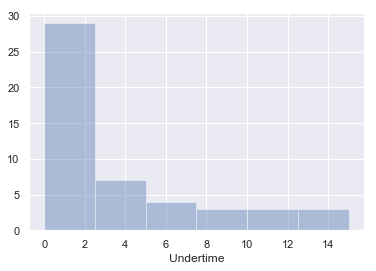

In [79]:
sns.distplot(december_df['Undertime'], kde=False)

### Joint Plot
This plot is used for bivariate comparison of data

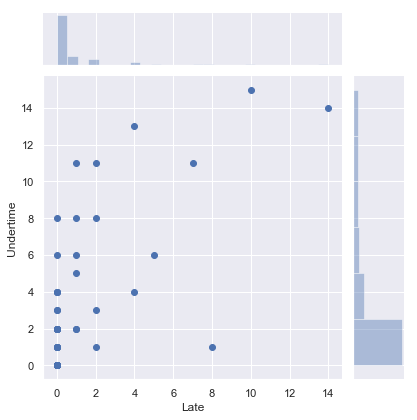

In [80]:
sns.jointplot('Late','Undertime', data= december_df)

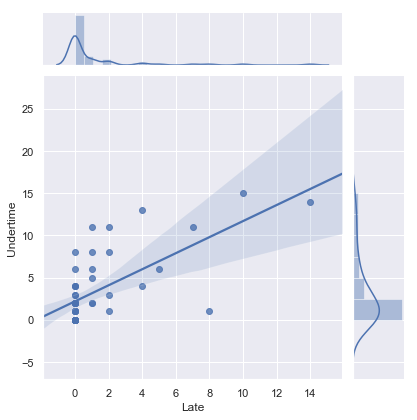

In [81]:
sns.jointplot('Late','Undertime', data= december_df, kind='reg')

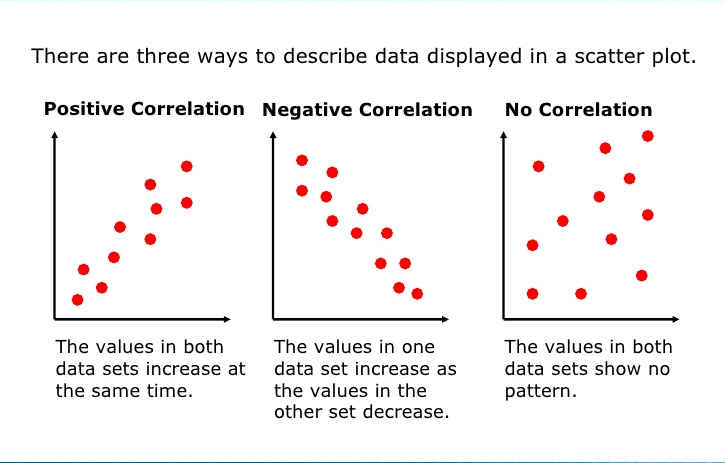

In [82]:
Image(filename='./images/scatterplot.png') 

### Pairplot
Visualize pairwise relationships across all variables in a dataframe

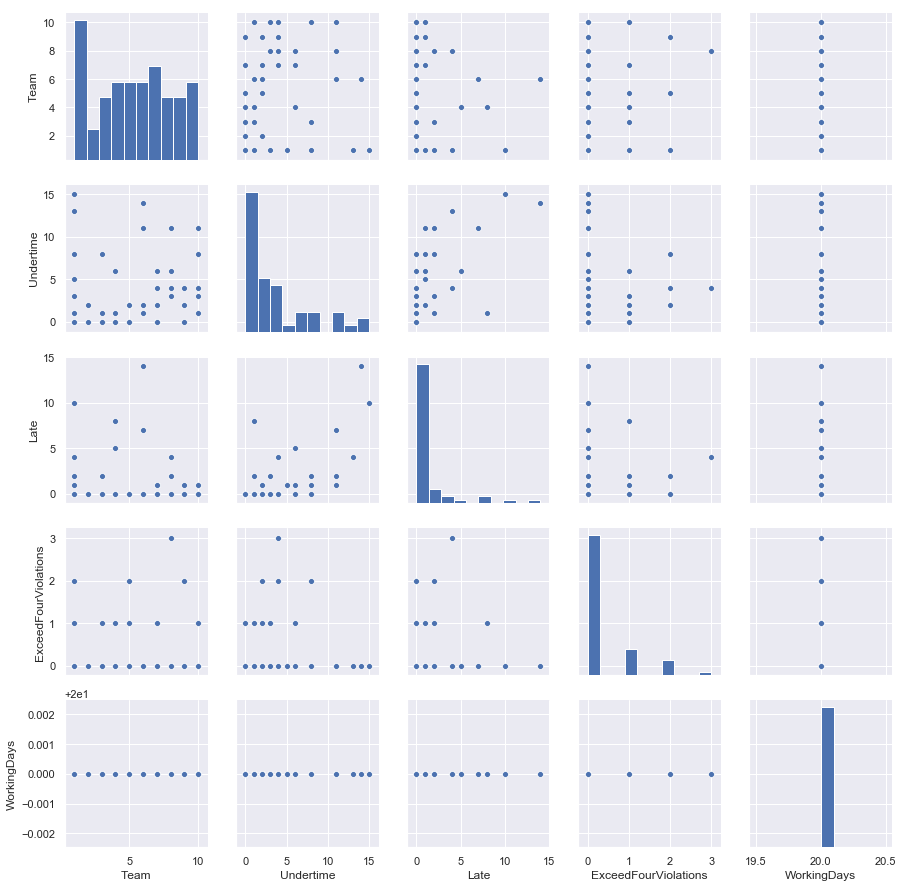

In [83]:
sns.pairplot(december_df)

Pass in a `hue` parameter to define a categorical variable to be used in the pairplot

/Users/alimjap/miniconda3/envs/datascience/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/alimjap/miniconda3/envs/datascience/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


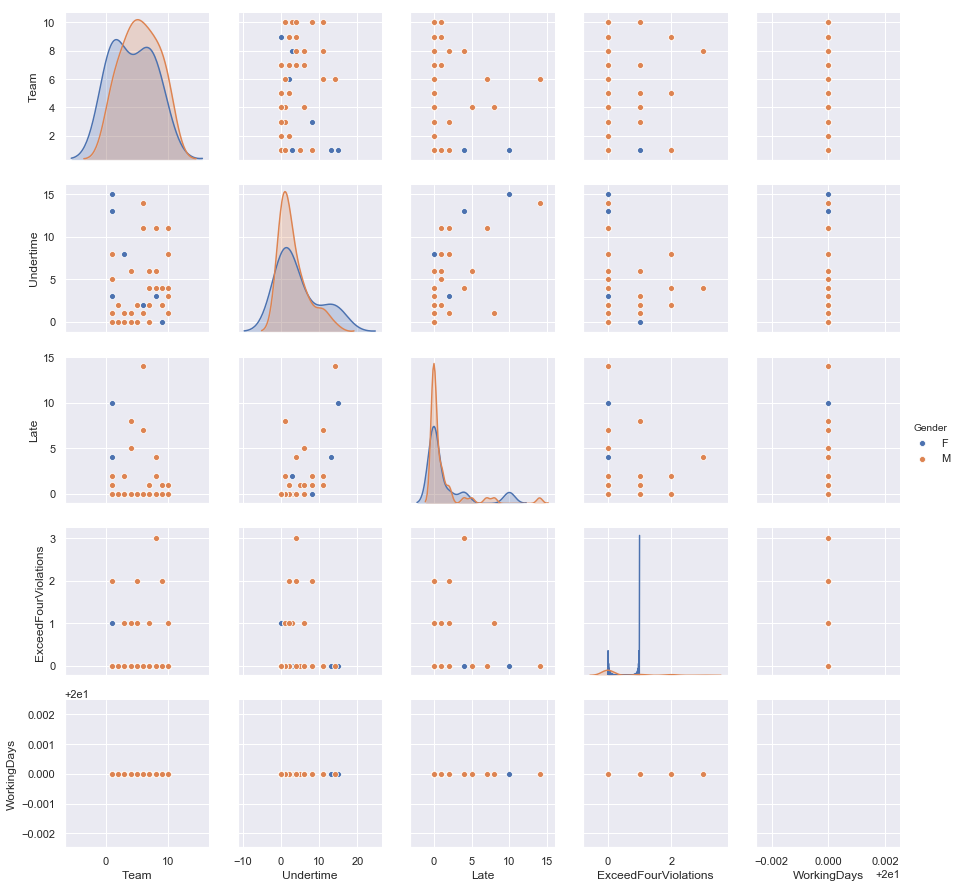

In [84]:
sns.pairplot(december_df, hue='Gender')

Pass in a `palette` parameter to specify a color scheme to be used in the plot

/Users/alimjap/miniconda3/envs/datascience/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/alimjap/miniconda3/envs/datascience/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


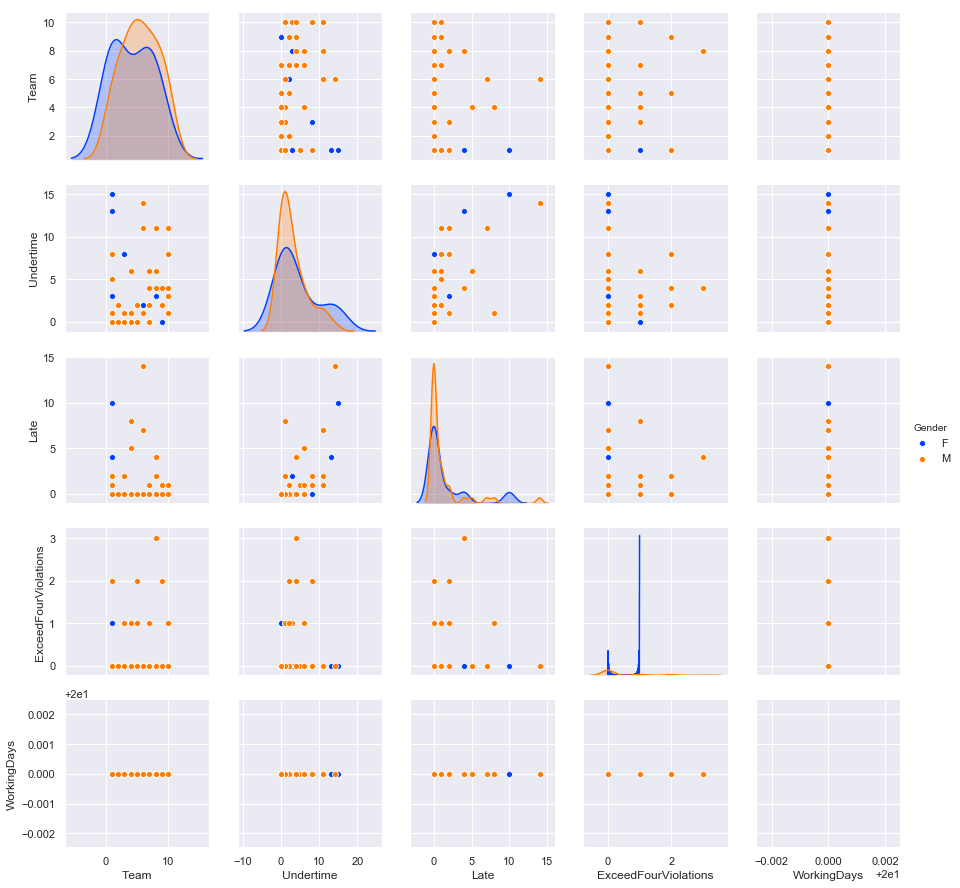

In [85]:
sns.pairplot(december_df, hue='Gender', palette= 'bright')

### Categorical Plots
These plots are used to visualize variables which are divided into discrete groups

#### Barplot

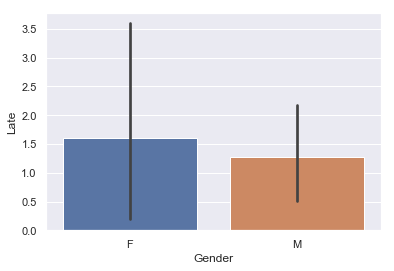

In [86]:
sns.barplot(x= 'Gender', y='Late', data=december_df)

Add an `estimator` parameter to change default aggregation function

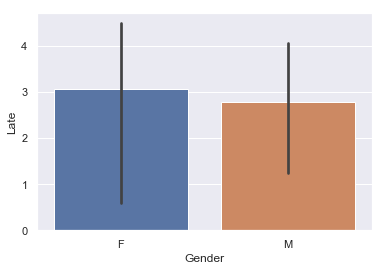

In [87]:
sns.barplot(x= 'Gender', y='Late', data=december_df, estimator=np.std)

#### Countplot
A plot similar to a barplot in which the estimator function explicitly counts the number of occurences of each categorical variable

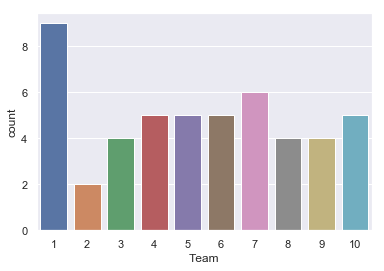

In [88]:
sns.countplot(x='Team', data= december_df)

### Boxplot
Is a standardized way of displaying the distribution of data based on the five number summary: **minimum**, **first quartile**, **median**, **third quartile**, and **maximum**.

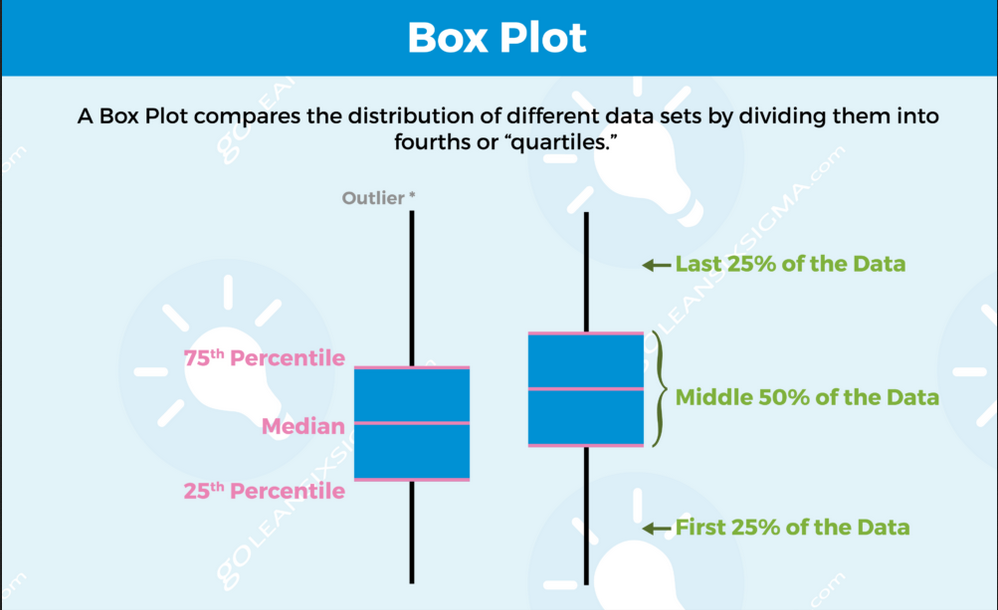

In [89]:
Image(filename='./images/boxplot.png') 

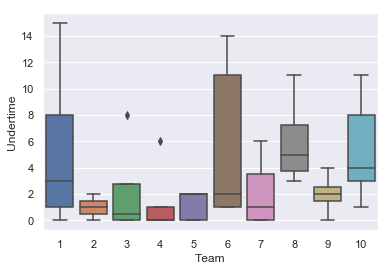

In [90]:
sns.boxplot(x='Team', y='Undertime', data=december_df)

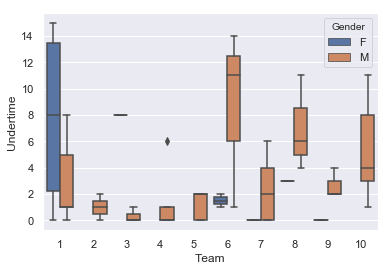

In [91]:
sns.boxplot(x='Team', y='Undertime', data=december_df, hue='Gender')

### Violin plot
A violin plot is a method of plotting numeric data. It is similar to box plot with a rotated kernel density plot on each side. A violin plot has four layers.

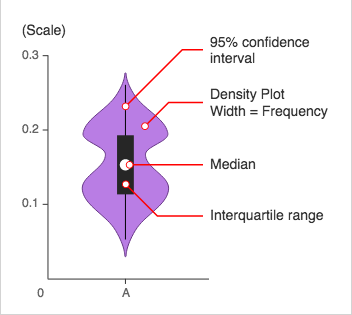

In [92]:
Image(filename='./images/violinplot.png') 

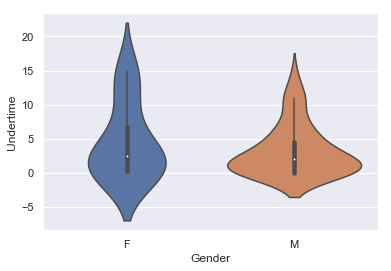

In [93]:
sns.violinplot(x='Gender', y='Undertime', data=december_df)

### Strip Plot
A strip plot is a graphical data anlysis technique for summarizing a univariate data set

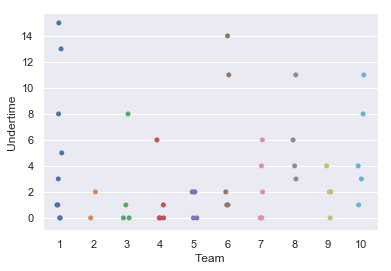

In [94]:
sns.stripplot(x='Team', y='Undertime', data=december_df)

To fix the display of closely rendered instances of data use the `jitter` parameter and set to True

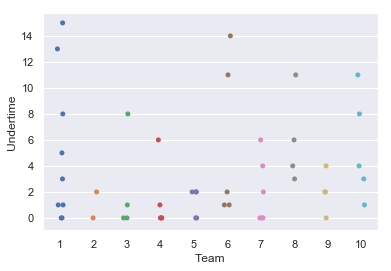

In [95]:
sns.stripplot(x='Team', y='Undertime', data=december_df, jitter=True)

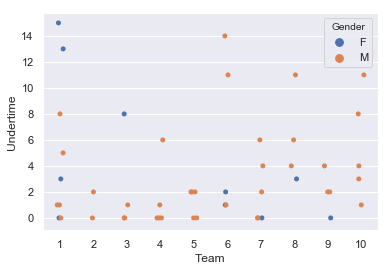

In [96]:
sns.stripplot(x='Team', y='Undertime', data=december_df, hue='Gender')

### Matrix Plots
Dataframes to be plotted in matrix visualizations need to be converted into a matrix format via `pivot_table()` or `corr()` function in Pandas 

In [97]:
december_df.head()

EmployeeName Gender Team  Undertime  Late  ExceedFourViolations     Month  \
0    Aristotle      F    1        3.0   0.0                   1.0  December   
1   Archimedes      M   10        3.0   0.0                   1.0  December   
2         Bell      M   10        8.0   1.0                   0.0  December   
3    Bernoulli      F    7        0.0   0.0                   1.0  December   
4         Bohr      F    3        8.0   0.0                   0.0  December   

   WorkingDays  
0           20  
1           20  
2           20  
3           20  
4           20

In [98]:
dec_corr_matrix=december_df.corr()
dec_corr_matrix

Undertime      Late  ExceedFourViolations  WorkingDays
Undertime              1.000000  0.665019             -0.016992          NaN
Late                   0.665019  1.000000              0.027371          NaN
ExceedFourViolations  -0.016992  0.027371              1.000000          NaN
WorkingDays                 NaN       NaN                   NaN          NaN

### Heatmap
A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

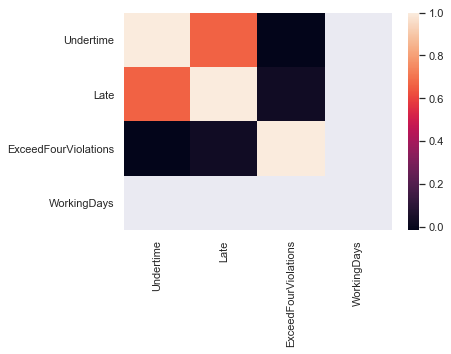

In [99]:
sns.heatmap(dec_corr_matrix)

Passing an *annotation* parameter in the `sns.heatmap()`

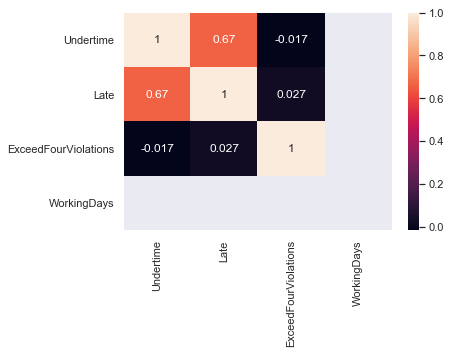

In [100]:
sns.heatmap(dec_corr_matrix, annot=True)

Another way of converting regular dataframes into matrix form is through pivot tables. In this example the `Gender` column will be used as the index

In [101]:
december_matrix= december_df.pivot_table(index='Gender', columns='Team', values='Late')
december_matrix

Team     1    2         3    4    5    6    7    8         9    10
Gender                                                            
F       3.5  NaN  0.000000  NaN  NaN  0.0  0.0  2.0  0.000000  NaN
M       0.6  0.0  0.666667  2.6  0.0  7.0  0.4  2.0  0.333333  0.4

The heatmap is rendered with an additional parameter `cmap` (color map)

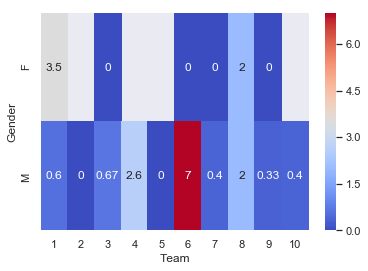

In [102]:
sns.heatmap(december_matrix, annot=True, cmap='coolwarm')

### Facet Grid
This plot maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

In [ ]:
g = sns.FacetGrid(data=december_df, col='Gender', row= 'Team')
#g.map(plt.scatter, 'Late', 'Undertime')